<a href="https://colab.research.google.com/github/anjalys/Image-Segmentation/blob/main/ImageSegmentation_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
from google.colab import files
datafile = files.upload()

Saving dogs.jpeg to dogs.jpeg


In [ ]:
from PIL import Image

In [ ]:
image = Image.open('dogs.jpeg')

In [ ]:
image_matrix = np.array(image)

x, y, z = image_matrix.shape

In [ ]:
import cv2
img=cv2.cvtColor(image_matrix,cv2.COLOR_BGR2RGB)
img

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[249, 248, 252],
        [251, 250, 254],
        [254, 253, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 245, 247],
        [249, 248, 250],
        [254, 253, 255],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[254, 251, 253],
        [254, 251, 253],
        [252, 251, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [ ]:
vectorized = image_matrix.reshape(x*y, z)
vectorized

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [ ]:
vectorized = np.float32(vectorized)
vectorized

array([[240., 240., 240.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [254., 254., 254.],
       [254., 254., 254.],
       [254., 254., 254.]], dtype=float32)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 3
attempts=10
error,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

In [ ]:
error

80202676.3656969

In [ ]:
np.unique(label)

array([0, 1, 2], dtype=int32)

In [ ]:
center = np.uint8(center)
center

array([[251, 247, 243],
       [ 29,  21,  20],
       [210, 174, 143]], dtype=uint8)

In [ ]:
result = center[label.flatten()]
result_image = result.reshape((img.shape))
print(result_image.shape)

(185, 272, 3)


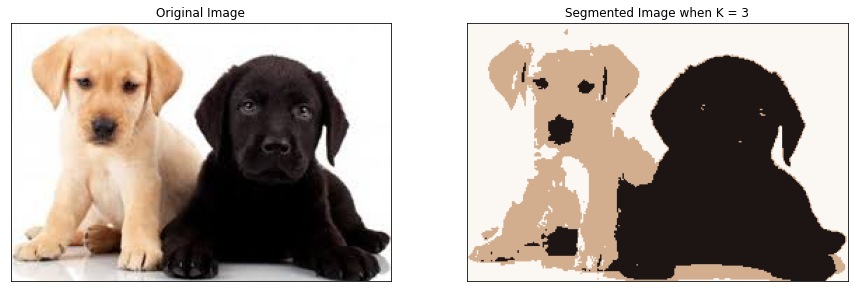

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])


plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = {}'.format(K))
plt.xticks([])
plt.yticks([])
plt.show()